In [2]:
%load_ext autoreload
%autoreload 2


from util2 import *
from myalgorithm_0627_1 import algorithm



궁금한 점: 현재의 단순한 랜덤화 알고리즘이 최선의 값을 출력해주는 것이 아니라 현재의 값을 출력해주는게 아닌가?

In [3]:
# problem_file = '../alg_test_problems_20240429/TEST_K100_1.json'
# problem_file = '../alg_test_problems_20240429/TEST_K200_1.json'
problem_file = r'C:\Users\hsh80\Desktop\LG CNS\stage1_problems\STAGE1_18.json'

timelimit = 60


with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

# checked_solution

Best obj = 7222.333333333333
-------------------------- new bundling
Best obj = 7217.89
Best obj = 7200.616666666667
Best obj = 7193.31
Best obj = 7183.94
Best obj = 7175.533333333334
Best obj = 7163.4366666666665
Best obj = 7153.643333333333
Best obj = 7151.17
Best obj = 7139.44
Best obj = 7120.473333333333
Best obj = 7104.246666666667
Best obj = 7094.84
Best obj = 7080.6866666666665
Best obj = 7079.963333333333
Best obj = 7063.923333333333
Best obj = 7061.13
Best obj = 7039.826666666667
Best obj = 7026.49
Best obj = 7017.906666666667
Best obj = 7004.736666666667
Best obj = 7003.923333333333
Best obj = 7003.526666666667
Best obj = 6995.09
Best obj = 6976.676666666666
Best obj = 6960.05
Best obj = 6936.8533333333335
Best obj = 6934.203333333333
Best obj = 6934.02
Best obj = 6922.6466666666665
Best obj = 6920.98
Best obj = 6913.943333333334
Best obj = 6902.2733333333335
Best obj = 6888.623333333333
Best obj = 6870.74
Best obj = 6856.086666666667
Best obj = 6842.79
Best obj = 6841.91
Bes

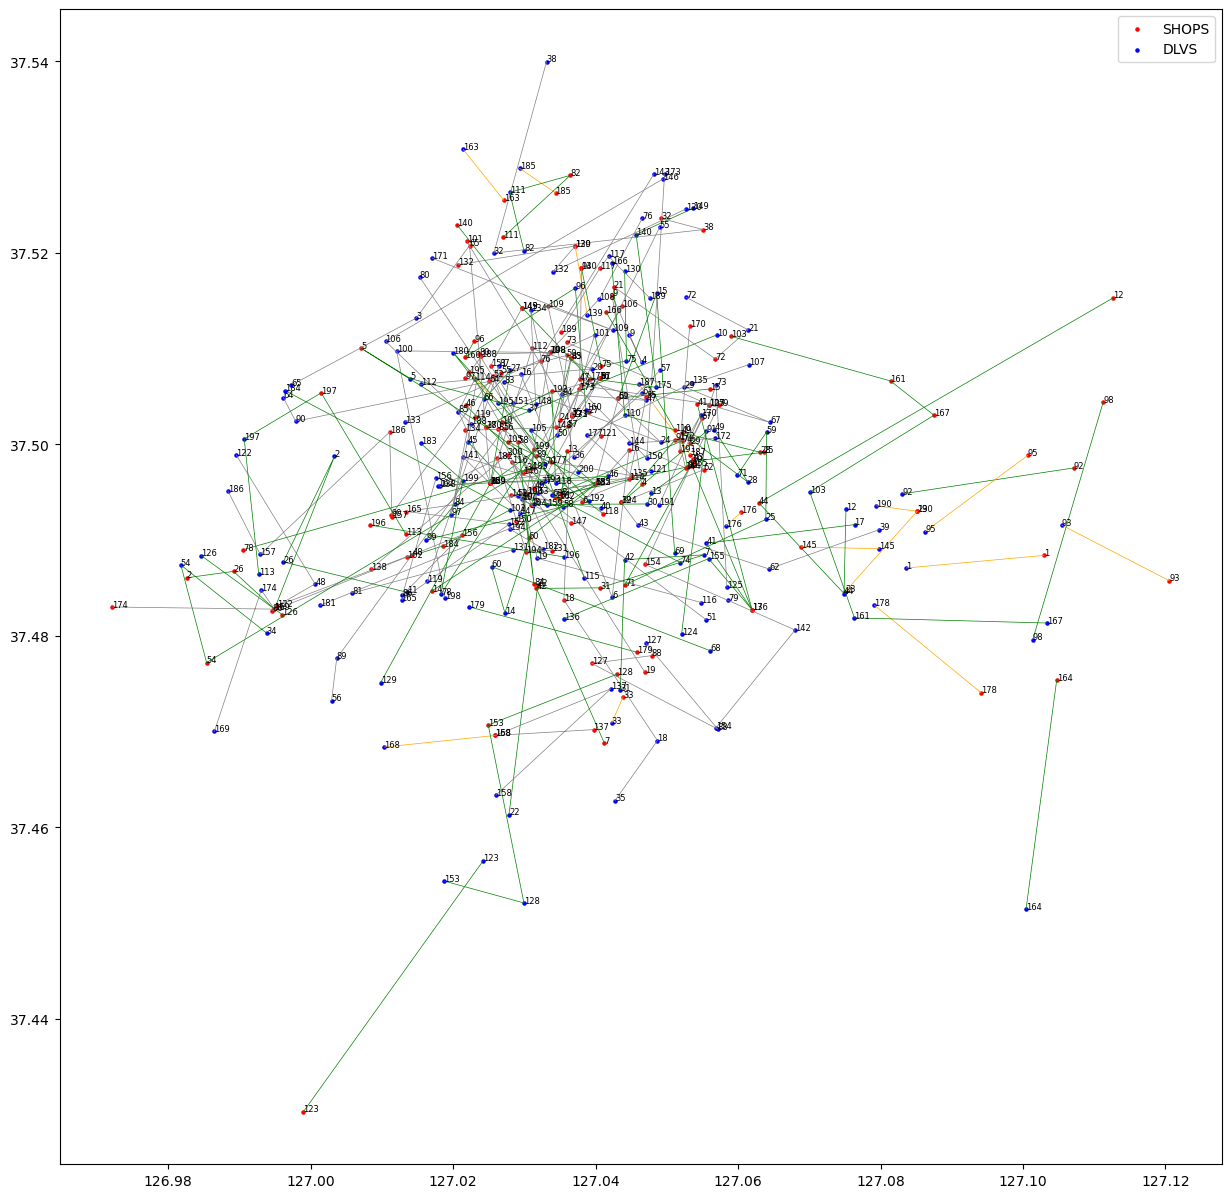

In [71]:
draw_route_solution2(ALL_ORDERS, checked_solution)

궁금한 점: 번들을 묶을 때 번들 내의 가장 이른 시점의 주문 준비 시간과 가장 늦은 시점의 주문 데드라인의 시간 차이의 분포는 어떻게 될까? - 만약 이것을 확인한다면, 처음부터 불가능에 가까운 것을 시도할 필요가 없지 않을까?

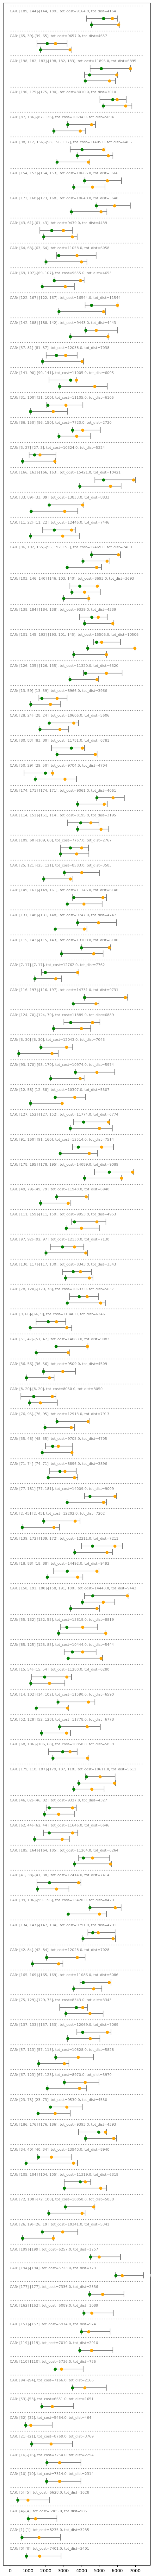

In [85]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)

In [73]:
inf = float('inf')

diffs = []
for bundle in checked_solution['bundles']:
    shops = bundle[1]

    if len(shops) <= 1:
        continue

    min_ready_time = inf
    max_deadline = -inf
    for order_num in shops:
        ready_time = ALL_ORDERS[order_num].ready_time
        deadline = ALL_ORDERS[order_num].deadline

        min_ready_time = min(min_ready_time, ready_time)
        max_deadline = max(max_deadline, deadline)

    diff = max_deadline - min_ready_time
    diffs.append(diff)


(array([ 3.,  9., 13., 11., 15., 12.,  9.,  5.,  2.,  1.]),
 array([1722. , 1945.4, 2168.8, 2392.2, 2615.6, 2839. , 3062.4, 3285.8,
        3509.2, 3732.6, 3956. ]),
 <BarContainer object of 10 artists>)

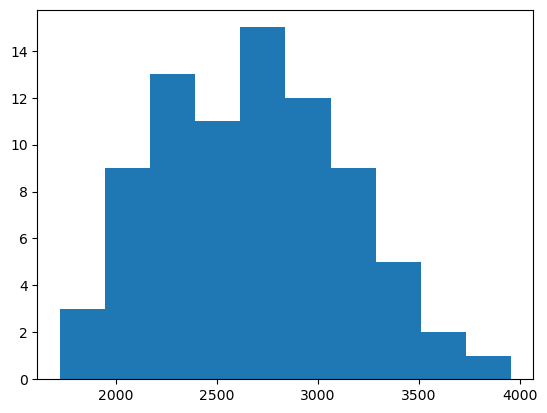

In [74]:
import matplotlib.pyplot as plt

plt.hist(diffs, bins=10)

(array([12., 21., 35., 27., 24., 32., 32., 13.,  3.,  1.]),
 array([ 438. ,  984.9, 1531.8, 2078.7, 2625.6, 3172.5, 3719.4, 4266.3,
        4813.2, 5360.1, 5907. ]),
 <BarContainer object of 10 artists>)

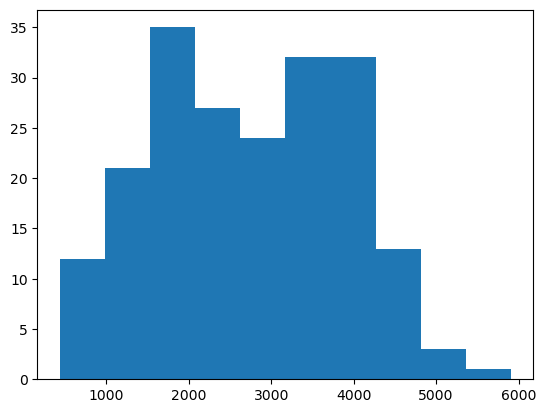

In [75]:
plt.hist([v.ready_time for v in ALL_ORDERS])

(array([11., 12., 33., 28., 21., 29., 34., 22.,  7.,  3.]),
 array([2203. , 2728.5, 3254. , 3779.5, 4305. , 4830.5, 5356. , 5881.5,
        6407. , 6932.5, 7458. ]),
 <BarContainer object of 10 artists>)

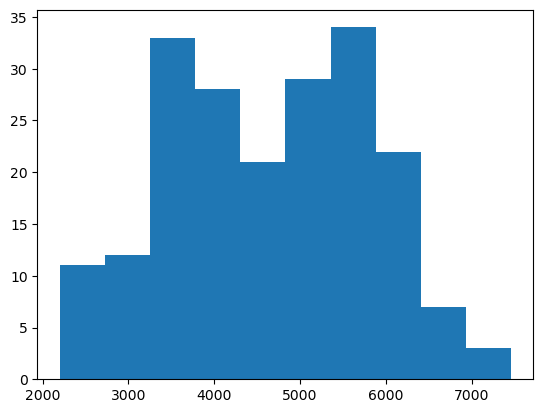

In [76]:
plt.hist([v.deadline for v in ALL_ORDERS])

(array([27., 41., 43., 28., 24., 18., 10.,  2.,  5.,  2.]),
 array([1423. , 1568.4, 1713.8, 1859.2, 2004.6, 2150. , 2295.4, 2440.8,
        2586.2, 2731.6, 2877. ]),
 <BarContainer object of 10 artists>)

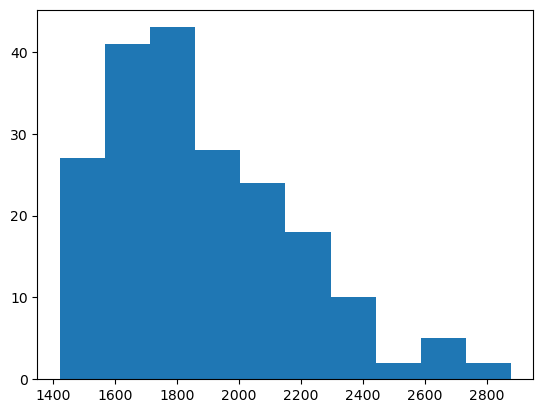

In [77]:
plt.hist([v.deadline - v.ready_time for v in ALL_ORDERS])

(array([ 3., 33., 34., 35., 23., 11., 20., 14.,  7.,  5.,  3.,  3.,  2.,
         1.,  1.,  1.,  1.,  0.,  1.,  2.]),
 array([  7.  ,  11.65,  16.3 ,  20.95,  25.6 ,  30.25,  34.9 ,  39.55,
         44.2 ,  48.85,  53.5 ,  58.15,  62.8 ,  67.45,  72.1 ,  76.75,
         81.4 ,  86.05,  90.7 ,  95.35, 100.  ]),
 <BarContainer object of 20 artists>)

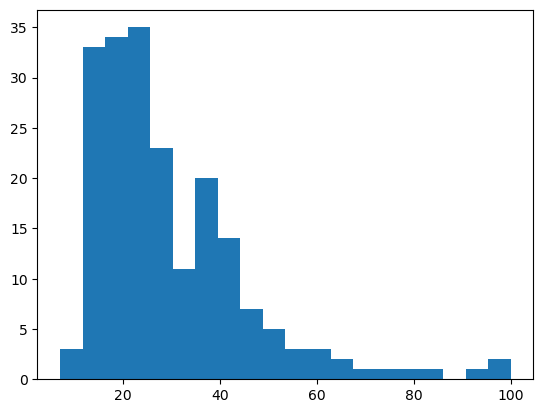

In [82]:
plt.hist([v.volume for v in ALL_ORDERS], bins=20)

In [81]:
ALL_RIDERS

[Rider([BIKE, 5.291005291005291, 100, 60, 5000, 120, 40]),
 Rider([WALK, 1.3227513227513228, 70, 30, 5000, 120, 60]),
 Rider([CAR, 4.2328042328042335, 200, 100, 5000, 180, 200])]

(array([17.,  0.,  0.,  0.,  0., 81.,  0.,  0.,  0.,  7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

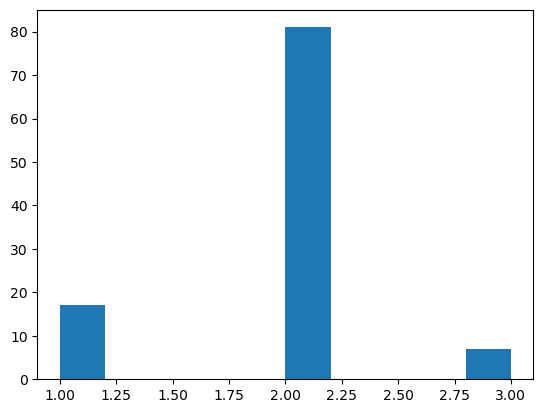

In [86]:
plt.hist([len(v[1]) for v in checked_solution['bundles']])

> 4개 이상의 주문을 가진 번들은 거의 나오지 않음.

1: 25, 2: 65, 3: 15 정도로 나옴